In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
import netCDF4 as nc
import numpy as np
import os
import pyproj

## AGASEA

In [3]:
data_dir = "/Users/lindzey/RadarData/ANTARCTIC/UTIG"
data_dir = "/media/psf/QIceRadar01/ANTARCTIC/UTIG"

data_filepath = os.path.join(data_dir, "AGASEA", "X63a", "X63a_3.nc")

In [4]:
data = nc.Dataset(data_filepath, 'r')

In [5]:
data

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Instrument: HiCARS
    Flight Transect: X63a
    dimensions(sizes): along-track sample(2720), range sample(3200)
    variables(dimensions): float64 latitude(along-track sample), float64 longitude(along-track sample), float64 elevation(along-track sample), float64 fast-time(range sample), float64 data_hi_gain(along-track sample,range sample), float64 data_lo_gain(along-track sample,range sample)
    groups: 

In [6]:
data.variables.keys()

dict_keys(['latitude', 'longitude', 'elevation', 'fast-time', 'data_hi_gain', 'data_lo_gain'])

In [10]:
data.variables['fast-time'][:]


/tmp/ipykernel_78220/3271051565.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data.variables['fast-time'][:]


masked_array(data=[0.00000000e+00, 2.00062520e-08, 4.00125039e-08, ...,
                   6.39599875e-05, 6.39799937e-05, 6.40000000e-05],
             mask=False,
       fill_value=1e+20)

In [11]:
'fast-time' in data.variables

True

In [8]:
dir(data.variables['longitude'])

/tmp/ipykernel_78220/1529983403.py:1: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  dir(data.variables['longitude'])


['Description',
 'Units',
 '__array__',
 '__class__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__orthogonal_indexing__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '_assign_vlen',
 '_check_safecast',
 '_cmptype',
 '_enumtype',
 '_get',
 '_getdims',
 '_getname',
 '_grp',
 '_grpid',
 '_has_lsd',
 '_iscompound',
 '_isenum',
 '_isprimitive',
 '_isvlen',
 '_name',
 '_ncstring_attrs__',
 '_nunlimdim',
 '_put',
 '_toma',
 '_use_get_vars',
 '_varid',
 '_vltype',
 'always_mask',
 'assignValue',
 'chartostring',
 'chunking',
 'datatype',
 'delncattr',
 'dimensions',
 'dtype',
 'endian',
 'filters',
 'getValue',
 'get_dims',
 'get_var_chunk_cache',
 'getncattr',
 'group',
 'mask'

In [14]:
lon = data.variables['longitude'][:].data
lat = data.variables['latitude'][:].data
radargram = data.variables['data_hi_gain'][:].data
radargram = np.log(radargram)

/tmp/ipykernel_74222/4143996586.py:1: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  lon = data.variables['longitude'][:].data


AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [10]:
ps71 = pyproj.Proj('epsg:3031')
xx, yy = ps71(lon, lat)

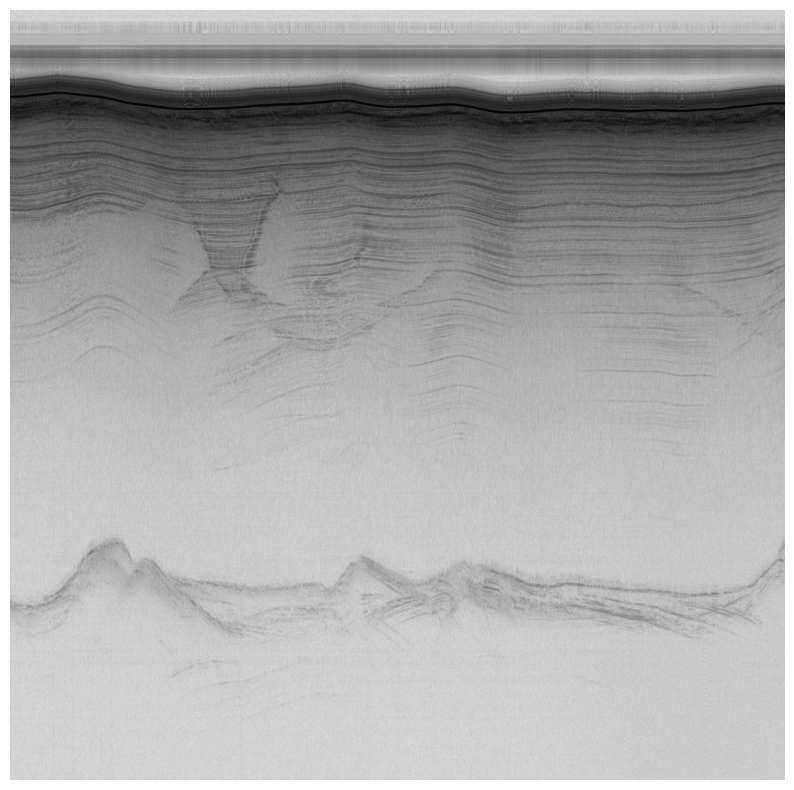

In [12]:
fig = plt.figure(figsize=(10, 10))
ax = fig.subplots(1,1)
ax.imshow(radargram.transpose(), cmap='gray_r', aspect='auto')
ax.set_ylim([2250, 0])
ax.axis('off')
fig.savefig("/Users/lindzey/Documents/QIceRadar/Presentations/2022_AGU/figures/X63a_full.png",bbox_inches="tight")

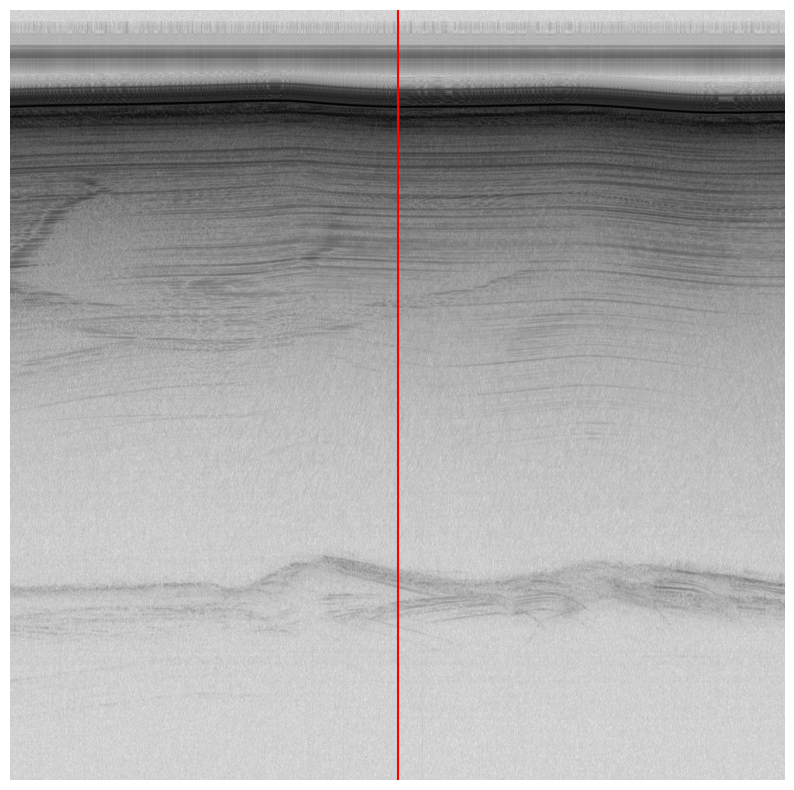

In [13]:
fig = plt.figure(figsize=(10, 10))
ax = fig.subplots(1,1)
ax.imshow(radargram.transpose(), cmap='gray_r', aspect='auto')
ax.set_ylim([2250, 0])
min_trace = 830
max_trace = 1830
ax.set_xlim([min_trace, max_trace])
ax.vlines([1330], 2250, 0, color='red')
ax.axis('off')
fig.savefig("/Users/lindzey/Documents/QIceRadar/Presentations/2022_AGU/figures/X63a_zoom.png",bbox_inches="tight")


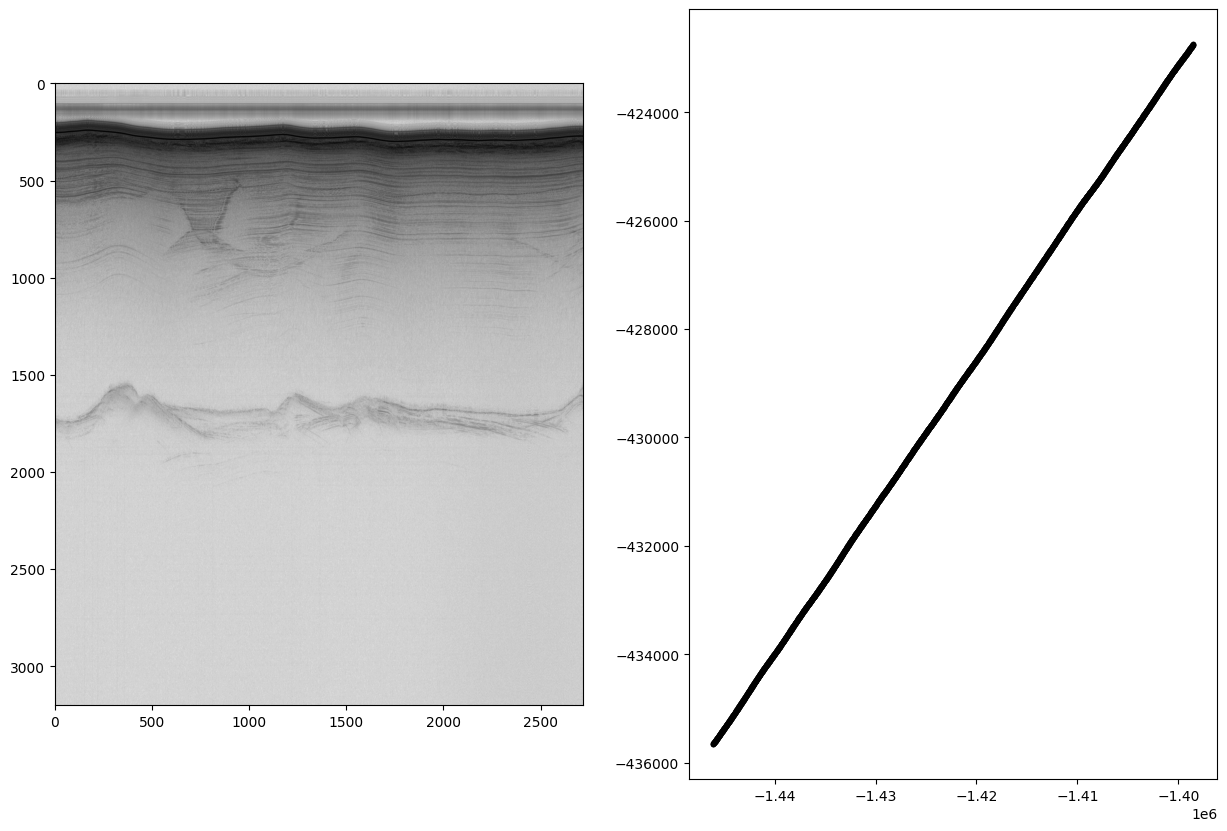

In [14]:
fig = plt.figure(figsize=(15, 10))
ax1, ax2, = fig.subplots(1,2)

ax1.imshow(radargram.transpose(), cmap='gray_r')
ax2.plot(xx, yy, 'k.')

#### What are the files in the Results directory?

In [17]:
results_filepath = os.path.join(data_dir, "AGASEA", "Results", "b13_results.nc")
print(os.path.isfile(results_filepath))

True


In [18]:
res = nc.Dataset(results_filepath, 'r')


In [19]:
res

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Instrument: PASIN
    Flight Transect: b13
    dimensions(sizes): along-track sample(18027)
    variables(dimensions): float64 latitude(along-track sample), float64 longitude(along-track sample), float64 radar_height(along-track sample), float64 ice_thickness(along-track sample), float64 reflectivity(along-track sample), float64 reflectivity_unc(along-track sample), float64 atten_rate(along-track sample), float64 atten_unc(along-track sample)
    groups: 

Drat. Looks like that's just the profile datasets, but they're not in a format that's easy to plot srf/bed picks on the radaragrams themselves. 

In [20]:
res.variables['ice_thickness'][:].data

array([2396.7, 2396.2, 2395.6, ..., 1832.9, 1759.5, 1760.5])

## EAGLE
#### Now on to the netCDFs for Eagle, released via AAD

In [12]:
eagle_filepath = os.path.join(data_dir, "EAGLE", "PEL_JKB2n_Y14a", "ER2HI1B_2016021_PEL_JKB2n_Y14a_004.nc")
os.path.isfile(eagle_filepath)

True

In [13]:
data = nc.Dataset(eagle_filepath, 'r')

In [14]:
data.variables.keys()

dict_keys(['time', 'fasttime', 'lat', 'lon', 'altitude', 'pitch', 'roll', 'heading', 'amplitude_low_gain', 'amplitude_high_gain'])

In [22]:
data.variables['time']

<class 'netCDF4._netCDF4.Variable'>
float32 time(time)
    units: seconds since 2016-01-24 00:00:00
    calendar: standard
    long_name: Time of day UTC
    standard_name: time
    axis: T
unlimited dimensions: time
current shape = (2865,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [26]:
lon = data.variables['lon'][:].data
lat = data.variables['lat'][:].data
radargram = data.variables['amplitude_high_gain'][:].data
#radargram = np.log(radargram)

In [27]:
ps71 = pyproj.Proj('epsg:3031')
xx, yy = ps71(lon, lat)

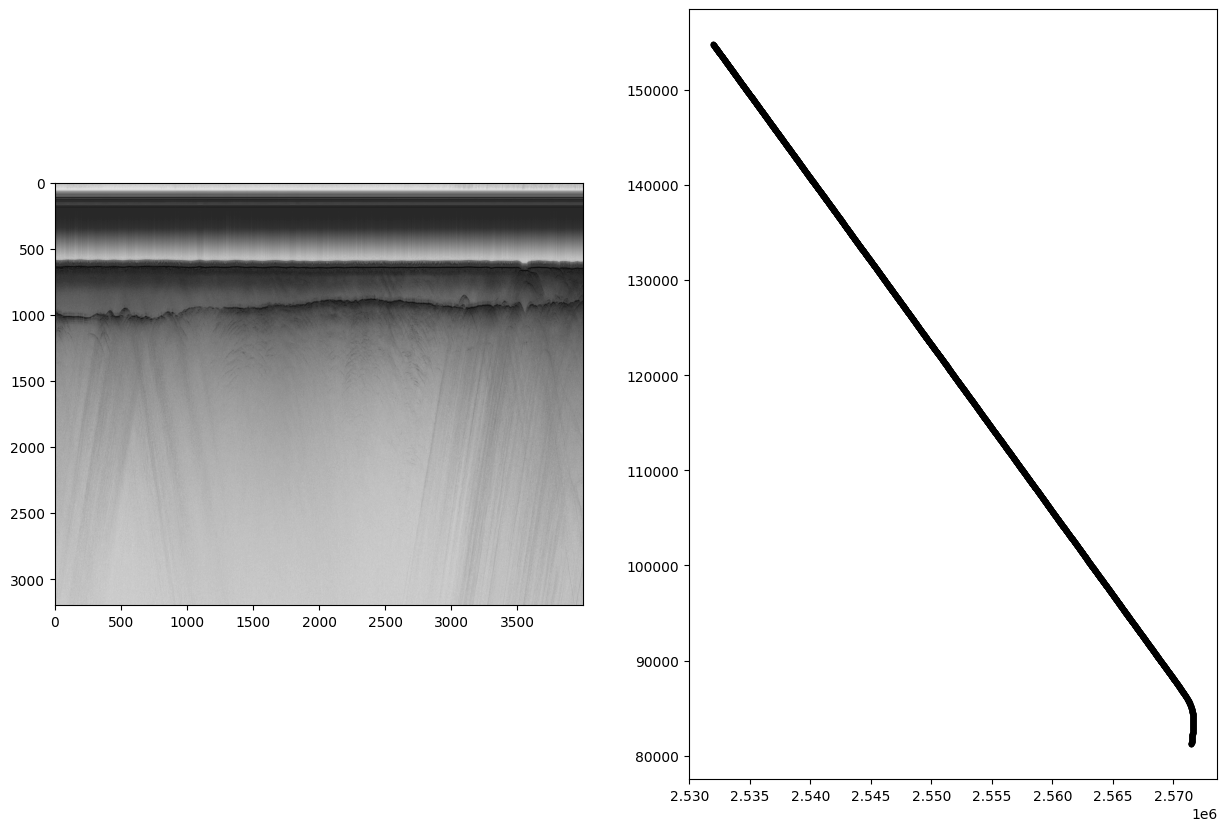

In [28]:
fig = plt.figure(figsize=(15, 10))
ax1, ax2, = fig.subplots(1,2)

ax1.imshow(radargram.transpose(), cmap='gray_r')
ax2.plot(xx, yy, 'k.')

## Lake Vostok

These radargrams are from USAP-DC


## OIA

Some of these radargrams suffered from tears.

In [17]:
oia_filepath = os.path.join(data_dir, "OIA", "OIA_JKB2n_X60a", "SR2HI1B_2016024_OIA_JKB2n_X60a_000.nc")
os.path.exists(oia_filepath)

True

In [18]:
data = nc.Dataset(oia_filepath, 'r')

In [19]:
data.variables.keys()

dict_keys(['time', 'fasttime', 'lat', 'lon', 'altitude', 'pitch', 'roll', 'heading', 'amplitude_low_gain', 'amplitude_high_gain'])

In [21]:
data.variables['time']

<class 'netCDF4._netCDF4.Variable'>
float32 time(time)
    units: seconds since 2016-01-24 00:00:00
    calendar: standard
    long_name: Time of day UTC
    standard_name: time
    axis: T
unlimited dimensions: time
current shape = (2865,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [33]:
data.instrument

'High Capability Airborne Radar Sounder (HiCARS 2)'

In [34]:
data.campaign

'2015_AN_UTIG'

In [35]:
data.funding

'This line was funded as part of OIA     NSF PLR-1443690 (SPICECAP), Antarctic Climate and Ecosystems Collaborative Research Center, and the G. Unger Vetlesen Foundation'

In [36]:
data.ncattrs()

['featureType',
 'location',
 'source',
 'data_version',
 'netcdf_version',
 'positioning',
 'title',
 'granule_id',
 'instrument',
 'institution',
 'funding',
 'flight',
 'campaign',
 'investigators',
 'history',
 'max_latitude_bound',
 'min_latitude_bound',
 'max_longitude_bound',
 'min_longitude_bound',
 'min_time_bound',
 'max_time_bound',
 'rfparams',
 'digital',
 'TX-record_offset',
 'antenna',
 'processing',
 'references']

In [37]:
data.variables.keys()

dict_keys(['time', 'fasttime', 'lat', 'lon', 'altitude', 'pitch', 'roll', 'heading', 'amplitude_low_gain', 'amplitude_high_gain'])

In [38]:
data.variables['fasttime'][:]

masked_array(data=[0.000e+00, 2.000e-02, 4.000e-02, ..., 6.394e+01,
                   6.396e+01, 6.398e+01],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

# ICECAP

In [25]:
icp_filepath = os.path.join(data_dir, "ICECAP", "TOT_JKB2d_X15a", "IR2HI1B_2011028_TOT_JKB2d_X15a_000.nc")
os.path.exists(icp_filepath)

True

In [27]:
data = nc.Dataset(oia_filepath, 'r')
data.variables.keys()

dict_keys(['time', 'fasttime', 'lat', 'lon', 'altitude', 'pitch', 'roll', 'heading', 'amplitude_low_gain', 'amplitude_high_gain'])

In [28]:
data.variables['time']

<class 'netCDF4._netCDF4.Variable'>
float32 time(time)
    units: seconds since 2016-01-24 00:00:00
    calendar: standard
    long_name: Time of day UTC
    standard_name: time
    axis: T
unlimited dimensions: time
current shape = (2865,)
filling on, default _FillValue of 9.969209968386869e+36 used

# GIMBLE

In [47]:
filepath = os.path.join(data_dir, "GIMBLE", "DVG_MKB2l_Y08a", "IRFOC1B_2014339_DVG_MKB2l_Y08a_000.nc")
filepath = os.path.join(data_dir, "GIMBLE", "ICP6_MKB2l_F09T01a", "IRFOC1B_2014341_ICP6_MKB2l_F09T01a_004.nc")
os.path.exists(filepath)

True

In [48]:
filepath

'/media/psf/QIceRadar01/ANTARCTIC/UTIG/GIMBLE/ICP6_MKB2l_F09T01a/IRFOC1B_2014341_ICP6_MKB2l_F09T01a_004.nc'

In [49]:
data = nc.Dataset(filepath, 'r')
data.variables.keys()

dict_keys(['time', 'fasttime', 'lat', 'lon', 'altitude', 'pitch', 'roll', 'heading', 'amplitude_low_gain', 'amplitude_high_gain'])

/tmp/ipykernel_78220/1855950810.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax1.plot(data.variables['lat'][:].data, 'k.')
/tmp/ipykernel_78220/1855950810.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax2.plot(data.variables['lon'][:].data, 'k.')


Text(0.5, 0.98, 'ICP6_MKB2l_F09T01a')

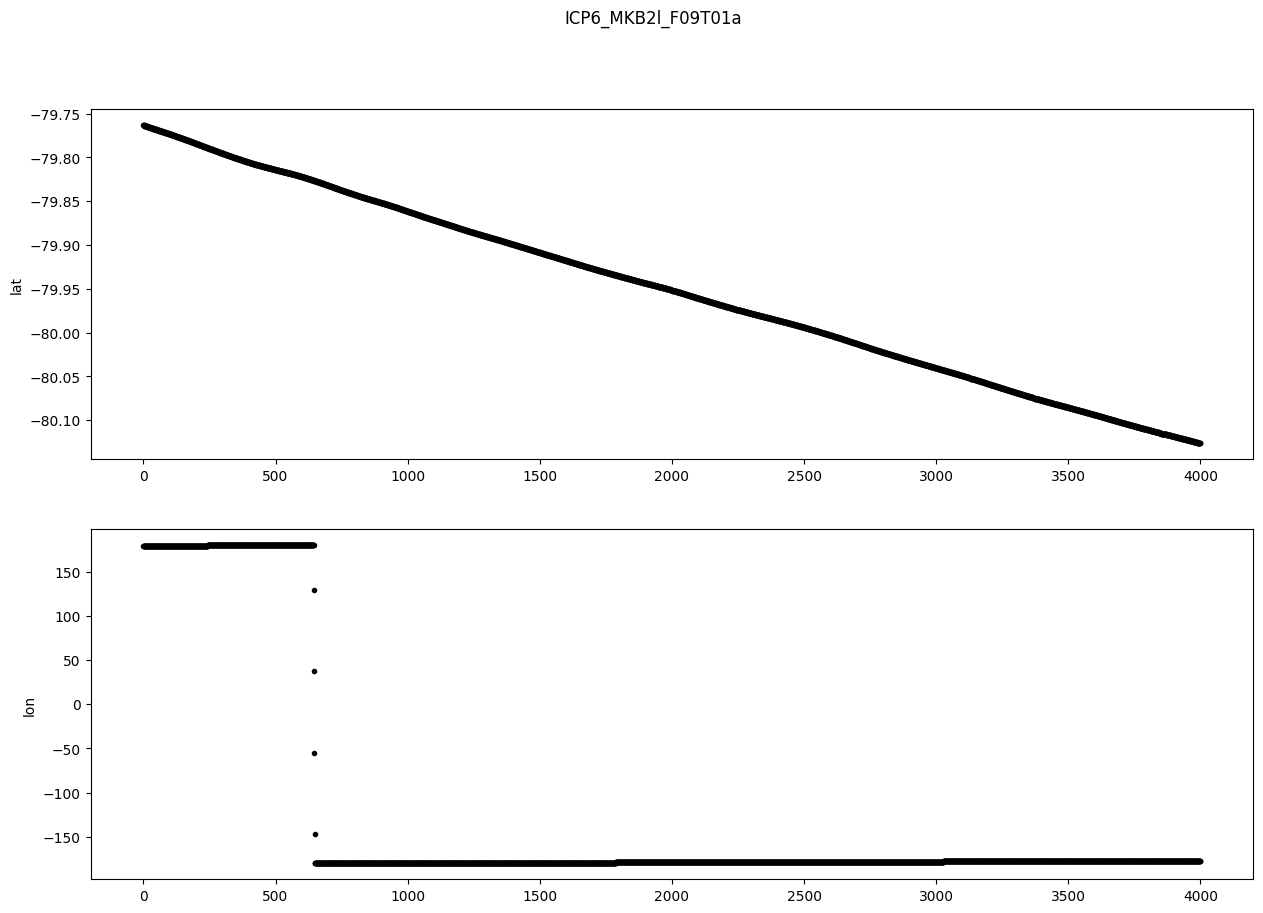

In [56]:
fig = plt.figure(figsize=(15, 10))
ax1, ax2, = fig.subplots(2, 1)
ax1.plot(data.variables['lat'][:].data, 'k.')
ax1.set_ylabel('lat')
ax2.plot(data.variables['lon'][:].data, 'k.')
ax2.set_ylabel('lon')
fig.suptitle('ICP6_MKB2l_F09T01a')


# COLDEX_2023

In [36]:
filepath = os.path.join(data_dir, "COLDEX_2023", "CLX_MKB2m_X48a", "IR2HI1B_2022363_CLX_MKB2m_X48a_000.nc")
os.path.exists(filepath)

True

In [37]:
data = nc.Dataset(filepath, 'r')
data.variables.keys()

dict_keys(['time', 'fasttime', 'lat', 'lon', 'altitude', 'pitch', 'roll', 'heading', 'amplitude_low_gain', 'amplitude_high_gain'])

In [39]:
radargram = data.variables['amplitude_high_gain'][:].data

/tmp/ipykernel_78220/339189704.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  radargram = data.variables['amplitude_high_gain'][:].data


In [42]:
data.variables['lat'].shape

(4000,)

In [58]:
radargram.transpose().shape

(3200, 4000)

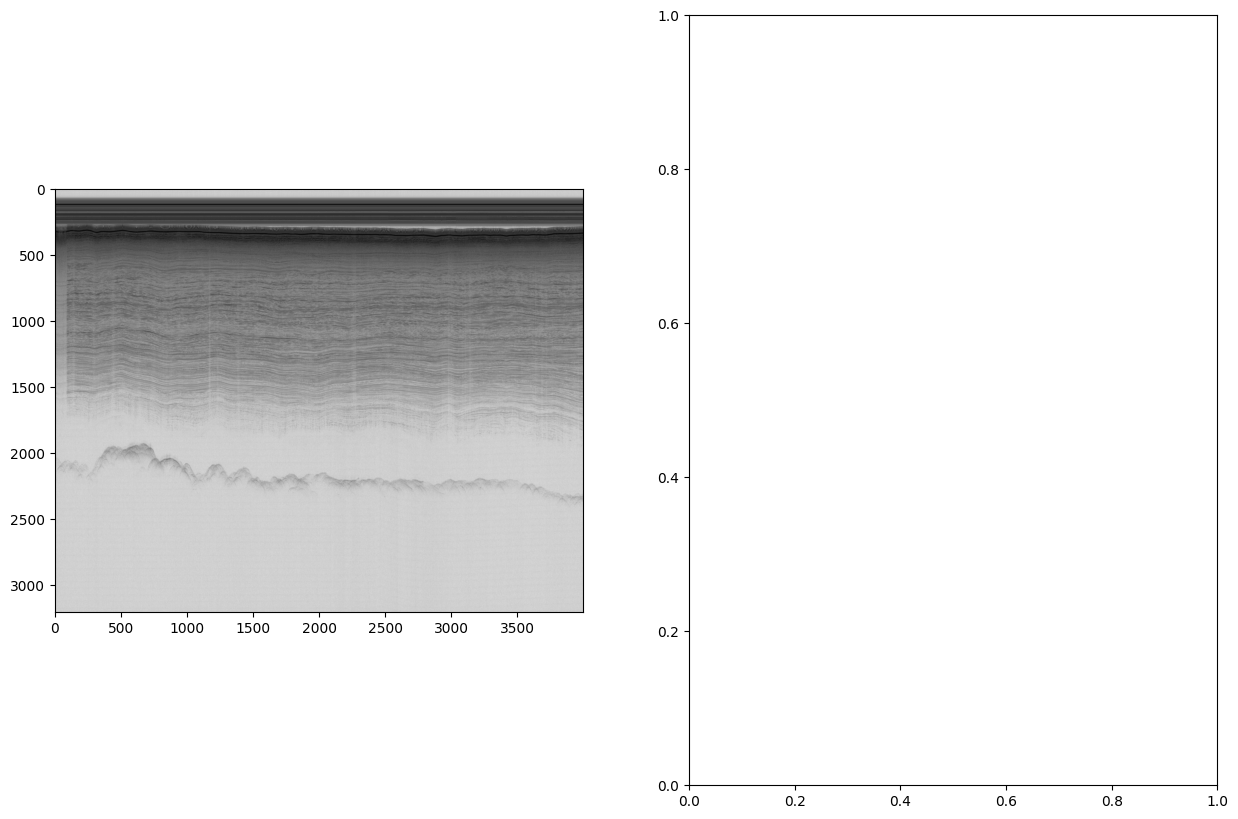

In [41]:
fig = plt.figure(figsize=(15, 10))
ax1, ax2, = fig.subplots(1,2)

ax1.imshow(radargram.transpose(), cmap='gray_r')
#ax2.plot(xx, yy, 'k.')

## Radargrams for E Mutter's cores

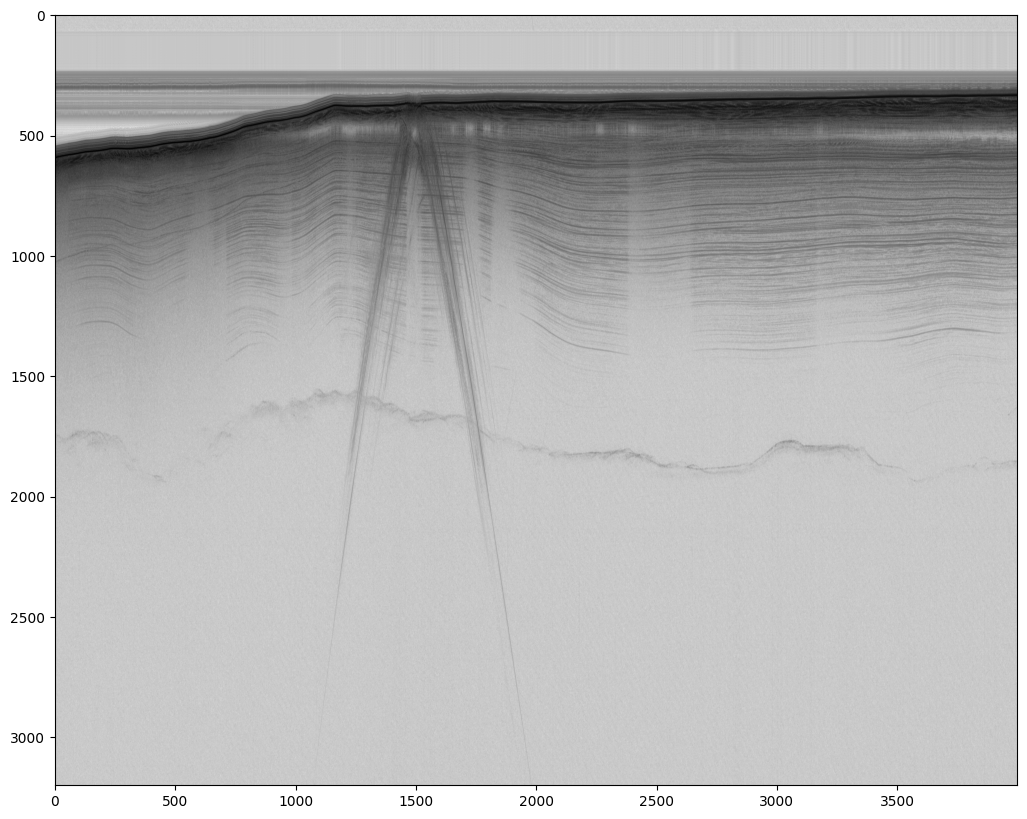

In [39]:
byrd_filepath = os.path.join(data_dir, "ICECAP", "ICP3_JKB2d_F56T02a", "IR2HI1B_2011031_ICP3_JKB2d_F56T02a_000.nc")
os.path.exists(byrd_filepath)
data = nc.Dataset(byrd_filepath, 'r')
radargram = data.variables['amplitude_high_gain'][:].data

fig = plt.figure(figsize=(15, 10))
ax1 = fig.subplots(1,1)

ax1.imshow(radargram.transpose(), cmap='gray_r')
fig.savefig("ICP3_JKB2d_F56T02a.png")

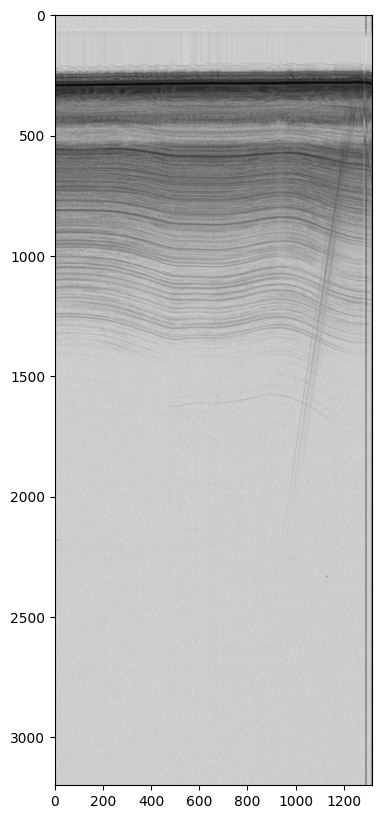

In [40]:
wais_filepath = os.path.join(data_dir, "ICECAP", "ICP3_JKB2d_F56T02a", "IR2HI1B_2011031_ICP3_JKB2d_F56T02a_002.nc")
os.path.exists(wais_filepath)
data = nc.Dataset(wais_filepath, 'r')
radargram = data.variables['amplitude_high_gain'][:].data

fig = plt.figure(figsize=(15, 10))
ax1 = fig.subplots(1,1)

ax1.imshow(radargram.transpose(), cmap='gray_r')
fig.savefig("ICP3_JKB2d_F56T02a_002.png")